In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


**LOAD DATA**

In [2]:
data = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

**DATA ClEANING**

In [3]:
print(f"The Shape of the dataset: {data.shape}\n")
print(f"Are there any missing values? \nAnswer: {data.isna().values.any()}\n")
print(f"Are there any Duplicates? \nAnswer: {data.duplicated().values.any()}\n")

The Shape of the dataset: (1000, 9)

Are there any missing values? 
Answer: False

Are there any Duplicates? 
Answer: False



**PREVIEW THE HEAD AND TAIL OF THE DATA SET**

In [4]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


**DESCRIBED THE DATA**

In [6]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**ABOUT THE DATA**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**Converted date object to datetime**

In [8]:
data.Date = pd.to_datetime(data.Date)

**How does customer age and gender influence their purchasing behavior?**

In [9]:
gender_count = data.Gender.value_counts()
import plotly.express as px

fig = px.pie(gender_count, 
             values=gender_count.values, 
             names=gender_count.index, 
             title='Pie chart the shows the percentage of Male to Female.',
             height=400,
             width=400)
fig.show()

In [10]:
bins = [0, 19, 29, 39, 49, 59, 69, 100]
labels = ['Young Adult', '20s', '30s', '40s','50s', '60s', '70 & Above']
data['Age Group'] = pd.cut(data.Age, bins=bins,labels=labels)

agegroup_count = data['Age Group'].value_counts().reset_index()
agegroup_count

bar = px.bar(agegroup_count,
             x='Age Group',
             y='count',
             color_continuous_scale='oranges',
             color="count",
             title='Purchasing power by Age Group',
             height=400)
bar.show()

In [11]:
gender_based_agegroup = data.groupby(['Gender', 'Age Group'], as_index=False).count()
gender_based_agegroup

bar = px.bar(gender_based_agegroup,
             x='Age Group',
             y='Customer ID',
             color="Gender",
             barmode='group',
             title='Gender that is doing the most transaction in their Age Group',
             height=400)
bar.show()

/tmp/ipykernel_17/318185177.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Are there discernible patterns in sales across different time periods?**

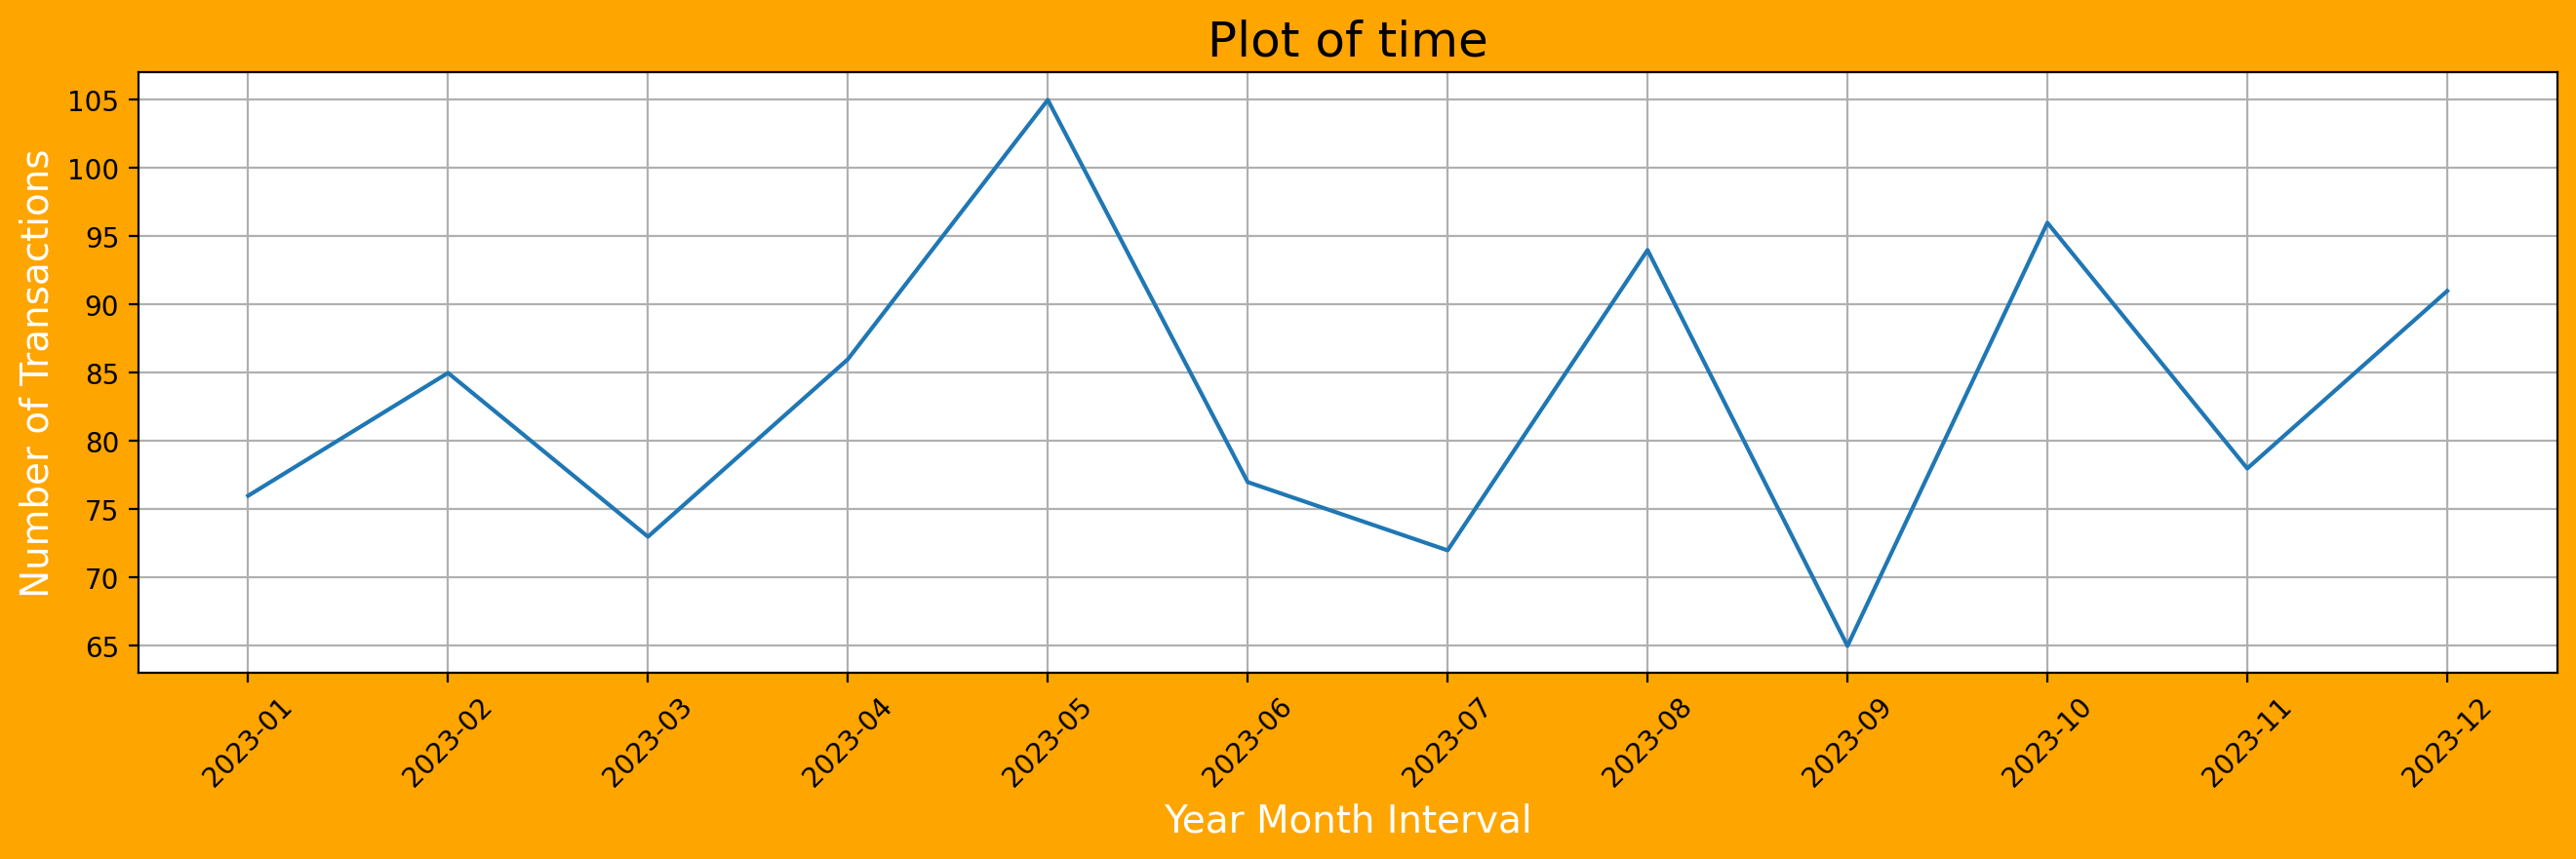

In [12]:
import matplotlib.pyplot as plt

data['Year Month'] = data.Date.dt.to_period('M').astype(str)

sales_periods = data.groupby('Year Month', as_index=False).count()[0:12]

plt.figure(figsize=(16, 4), dpi=200,facecolor='orange')
plt.title('Plot of time', fontsize=18)
plt.grid(visible=True)
plt.xticks(rotation=45)
plt.xlabel('Year Month Interval', color='white', fontsize=14)
plt.ylabel('Number of Transactions', color='white', fontsize=14)

plt.plot(sales_periods['Year Month'], sales_periods['Customer ID'])

**Which product categories hold the highest appeal among customers?**

In [13]:
product_category = data['Product Category'].value_counts().reset_index()
product_category

,Product Category,count
0,Clothing,351
1,Electronics,342
2,Beauty,307


In [14]:
fig = px.pie(product_category,
             values='count',
             names='Product Category',
             title='Pie chart the shows the percentage for highest appeal among customers.',
             height=400,
             width=700)
fig.show()

**What are the relationships between age, spending, and product preferences?**

In [15]:
age_spending = data.groupby(['Age Group'], as_index=False, observed=False)['Price per Unit'].mean()
bar = px.bar(age_spending, 
             x='Age Group', 
             y='Price per Unit', 
             color_continuous_scale='oranges', 
             color="Price per Unit",
             title='The Age Group Average Spendings',
             height=400)
bar.show()

In [16]:
age_spending_product = data.groupby(['Age Group', 'Product Category'], as_index=False, observed=False)['Price per Unit'].mean()
age_spending_product
bar = px.bar(age_spending_product,
             x='Age Group',
             y='Price per Unit',
             color_continuous_scale='oranges', 
             color='Product Category', 
             barmode='group',
             title='The Age Group Average Spendings and the Product Category',
             height=400)
bar.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**How do customers adapt their shopping habits during seasonal trends?**

In [17]:
Quantity_monthly = data.groupby('Year Month', as_index= False).Quantity.sum()[0:12]
bar = px.bar(Quantity_monthly, 
             x='Year Month', 
             y='Quantity', 
             color_continuous_scale='oranges', 
             color='Quantity',
             title='Customers habit to Quantity in different Periods',
             height=400)
bar.show()

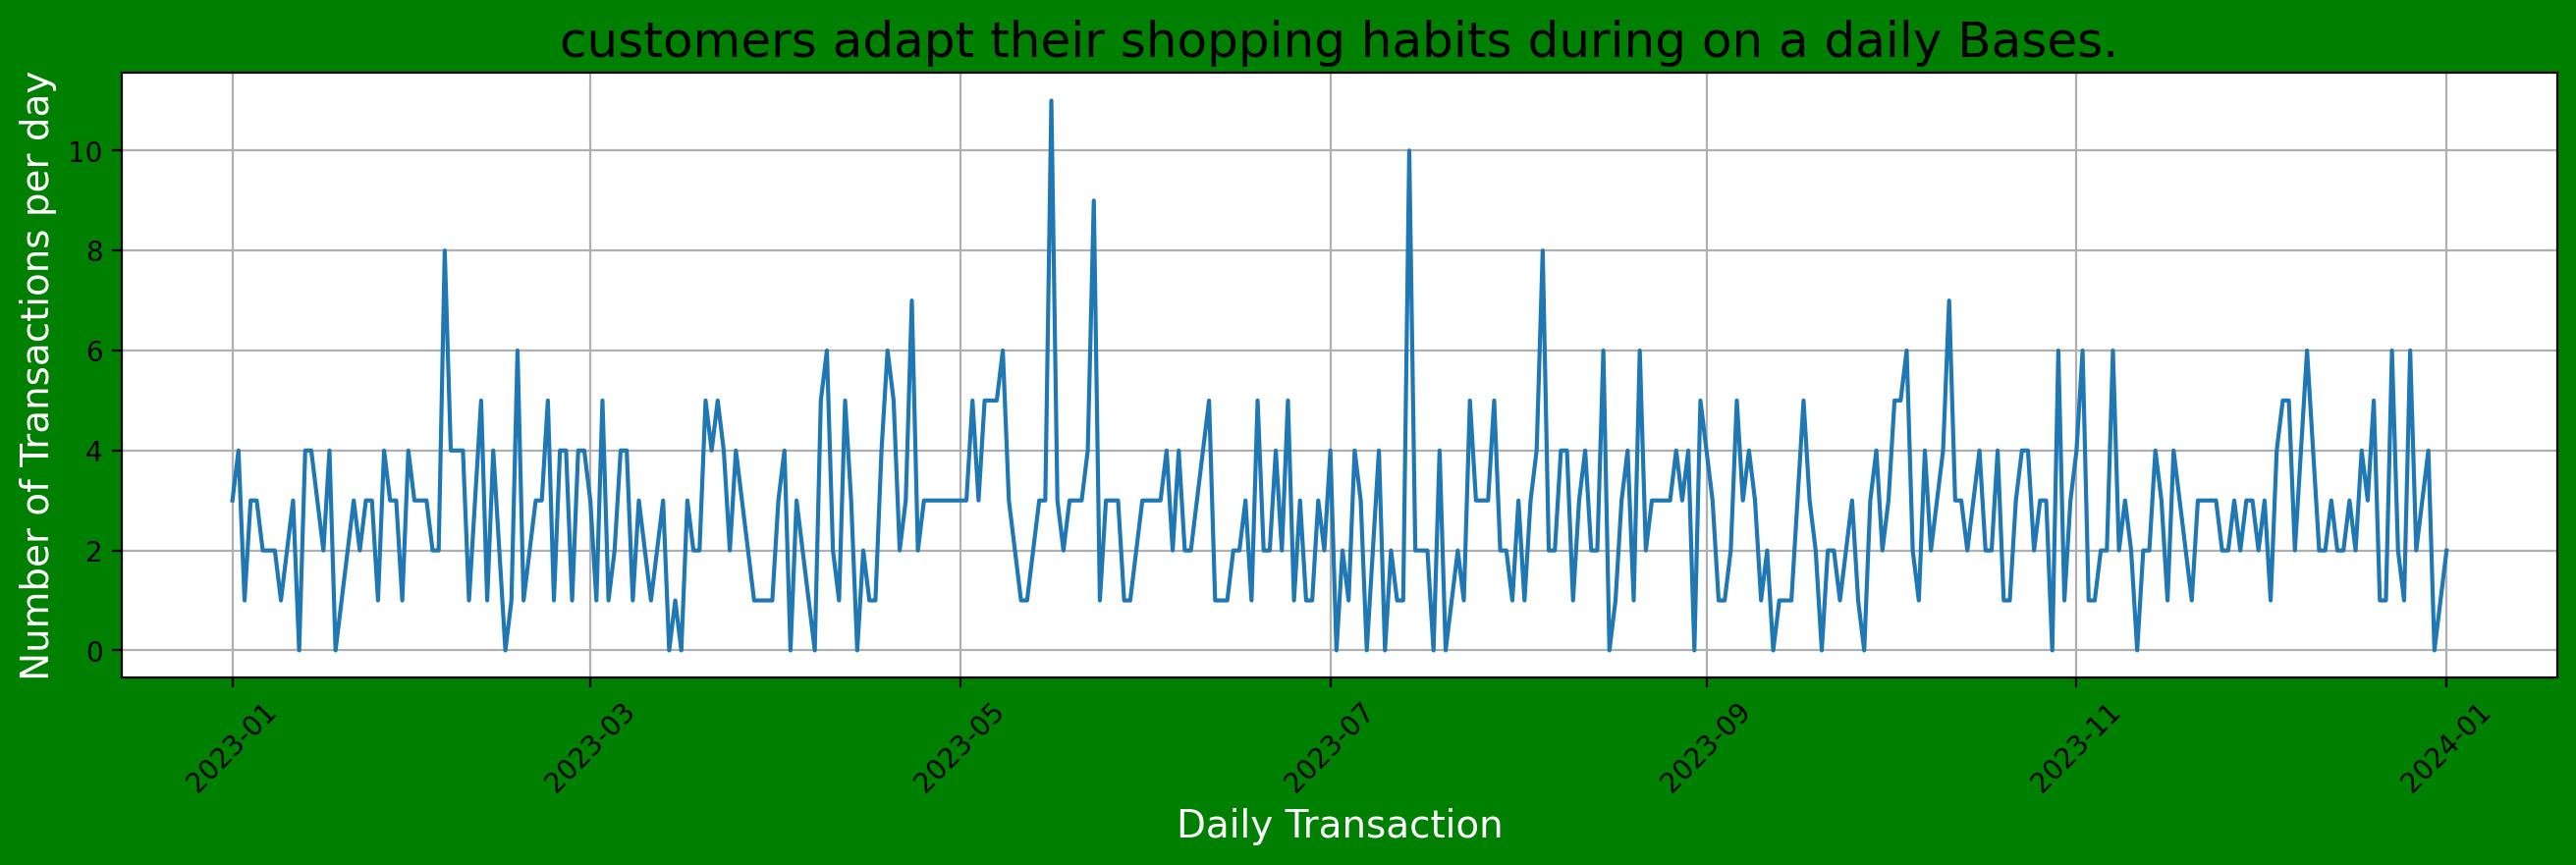

In [18]:
daily_transaction = data.set_index('Date').resample('D').count()

plt.figure(figsize=(16, 4), dpi=200,facecolor='green')
plt.title('customers adapt their shopping habits during on a daily Bases.', fontsize=18)
plt.grid(visible=True)
plt.xticks(rotation=45)
plt.xlabel('Daily Transaction', color='white', fontsize=14)
plt.ylabel('Number of Transactions per day', color='white', fontsize=14)

plt.plot(daily_transaction.index, daily_transaction['Customer ID'])


**Are there distinct purchasing behaviors based on the number of items bought per transaction?**

In [19]:
num_item_per_trans = data.Quantity.value_counts().reset_index()
bar = px.bar(num_item_per_trans, 
             x='Quantity', 
             y='count', color_continuous_scale='oranges', 
             color='count',
             title='Summary of the quantity of items',
             height=400)
bar.show()

**What insights can be gleaned from the distribution of product prices within each category?**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



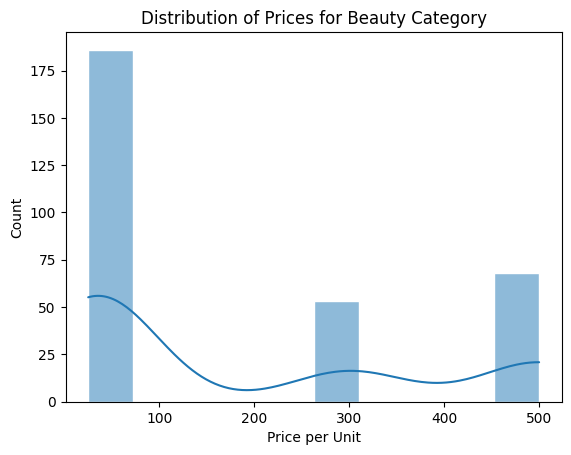

In [20]:
beauty_prices = data[data['Product Category'] == 'Beauty']
import seaborn as sns
plt.title('Distribution of Prices for Beauty Category')
sns.set(style="darkgrid")
sns.histplot(data=beauty_prices, x="Price per Unit", kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



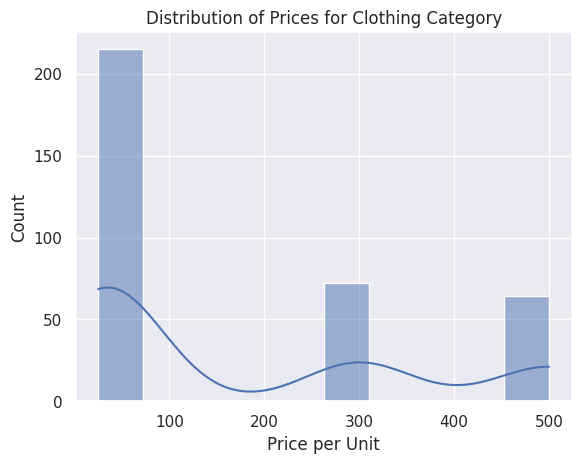

In [21]:
Clothing_prices = data[data['Product Category'] == 'Clothing']
import seaborn as sns
plt.title('Distribution of Prices for Clothing Category')
sns.set(style="darkgrid")
sns.histplot(data=Clothing_prices, x="Price per Unit", kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



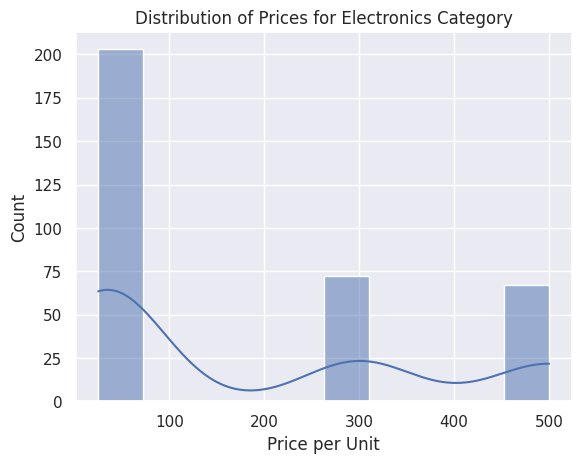

In [22]:
Electronics_prices = data[data['Product Category'] == 'Electronics']
import seaborn as sns
plt.title('Distribution of Prices for Electronics Category')
sns.set(style="darkgrid")
sns.histplot(data=Electronics_prices, x="Price per Unit",kde=True)
plt.show()